# Swiss Roll Dataset

In [1]:
%load_ext autoreload

In [2]:
import os
import torch
import matplotlib.pyplot as plt
import pyvista as pv
import seaborn as sns
from pdmtut.datasets import SwissRoll
import numpy as np
import math

In [3]:
store_results = True

In [4]:
pv.set_plot_theme("document")

if store_results:
    result_save_path = '../../results/swiss_roll/dataset'
    pv.set_jupyter_backend('None')
else:
    pv.set_jupyter_backend('ipygany')
    result_save_path = None

In [5]:
dataset = SwissRoll(n_samples=100**2, seed=11)

In [6]:
(uniform_state, uniform_log_prob, uniform_index_colors), (
    uniform_ds_z, uniform_ds_u, uniform_ds_y) = dataset.sample_points_uniformly(n_samples=100**2, seed=11, return_intermediate_steps=True)

In [7]:
(sampled_state, sampled_log_prob, sampled_index_colors), (
    sampled_ds_z, sampled_ds_u, sampled_ds_y) = dataset.sample_points_randomly(n_samples=100**2, seed=11, return_intermediate_steps=True)

## Continuous Dataset

### Colored by density

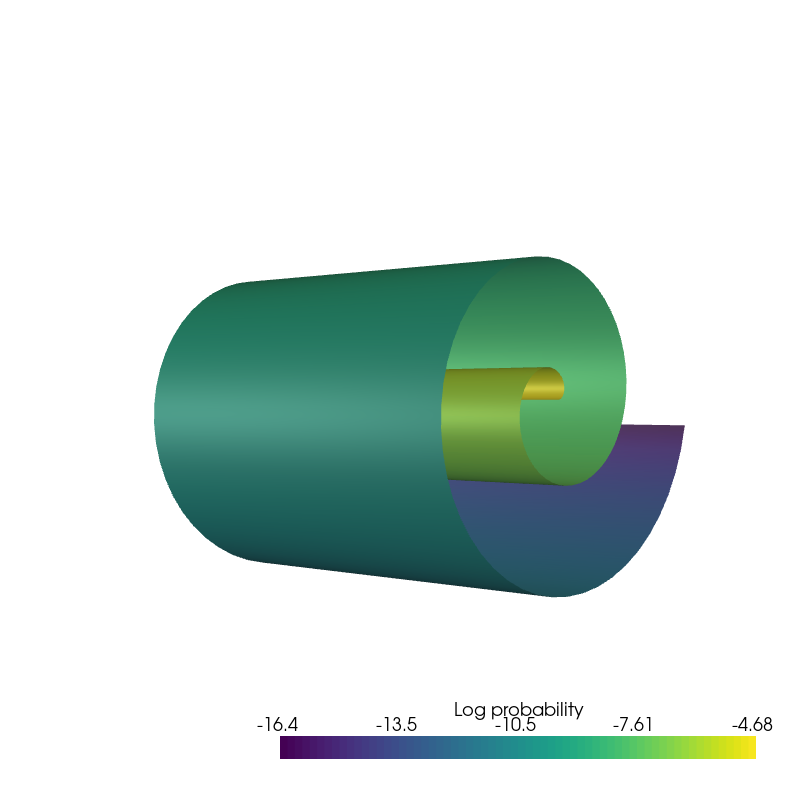

In [8]:
plotter = pv.Plotter()
plotter.add_mesh(
    pv.StructuredGrid(*uniform_state.view(100, 100, 3).permute(2, 0, 1).numpy()),
    scalars=uniform_log_prob, style='surface', pbr=True, metallic=0.2, roughness=0.6,
    scalar_bar_args={'title':'Log probability'}
)

plotter.add_light(pv.Light(
    position=(-65, 0, -65), show_actor=True, positional=True,
    cone_angle=100, intensity=2.))
plotter.add_light(pv.Light(
    position=(0, 0, -65), show_actor=True, positional=True,
    cone_angle=100, intensity=2.))
plotter.camera_position = [(-65, 0, 65), (0, 0, 0), (0, 1, 0)]
plotter.show(window_size=[800,800])
if result_save_path is not None: plotter.screenshot(os.path.join(result_save_path, 'continuous_density.png'))

### Colored by index

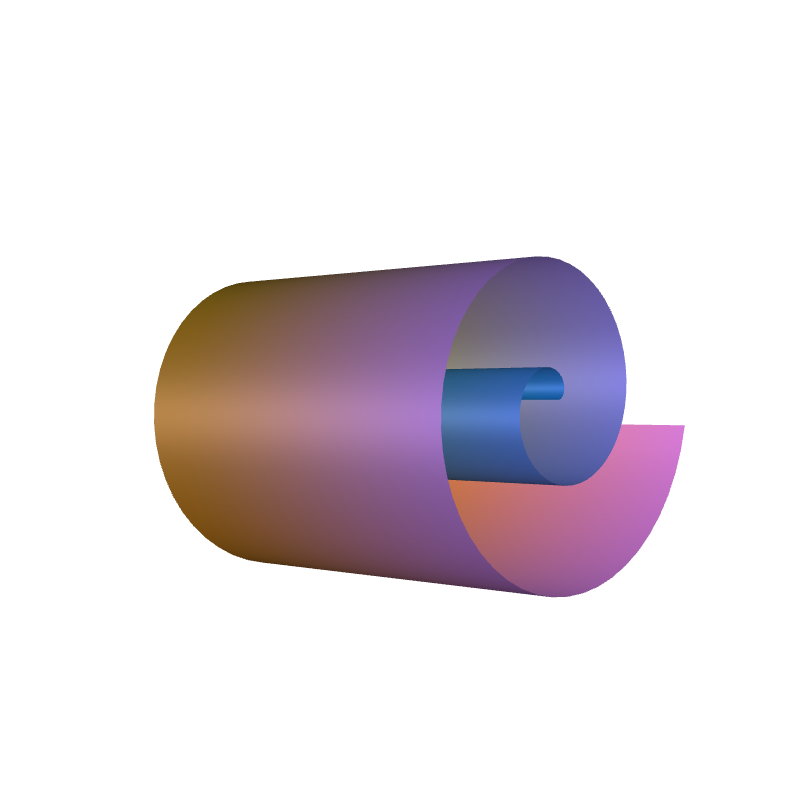

In [9]:
plotter = pv.Plotter()
plotter.add_mesh(
    pv.StructuredGrid(*uniform_state.detach().view(100, 100, 3).permute(2, 0, 1).numpy()),
    scalars=uniform_index_colors, style='surface',  pbr=True, metallic=0.2, roughness=0.6,
    rgb=True
)

plotter.add_light(pv.Light(
    position=(-65, 0, -65), show_actor=True, positional=True,
    cone_angle=100, intensity=2.))
plotter.add_light(pv.Light(
    position=(0, 0, -65), show_actor=True, positional=True,
    cone_angle=100, intensity=2.))
plotter.camera_position = [(-65, 0, 65), (0, 0, 0), (0, 1, 0)]
plotter.show(window_size=[800,800])
if result_save_path is not None: plotter.screenshot(os.path.join(result_save_path, 'continuous_index.png'))

## Input representation

In [10]:
from pdmtut.vis import plot_representation

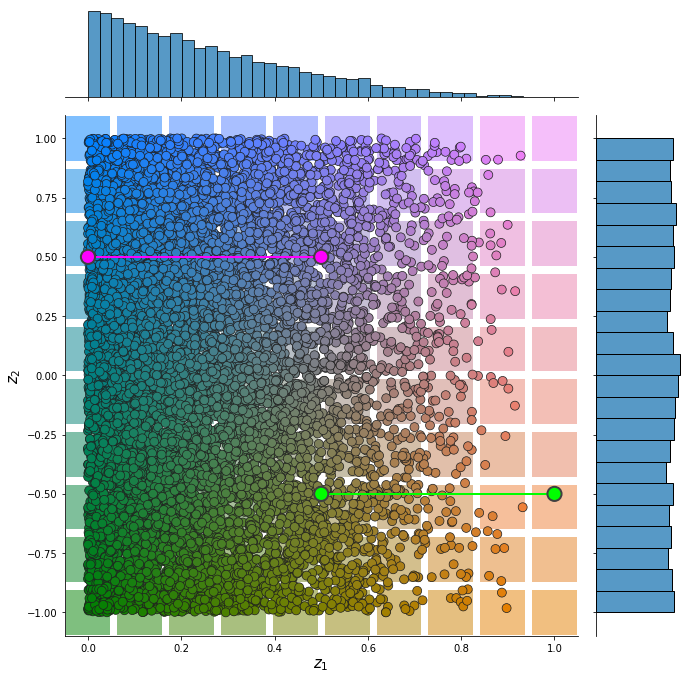

In [11]:
z_extremes = dataset.z_extremes
z_coordinates = sampled_ds_z.state.detach()

plot_representation(
    z_coordinates.numpy(), index_colors=sampled_index_colors, z_extremes=z_extremes, 
    interpolate_background=True, root=result_save_path
)

## Input Reconstruction

In [12]:
from pdmtut.vis import plot_reconstruction

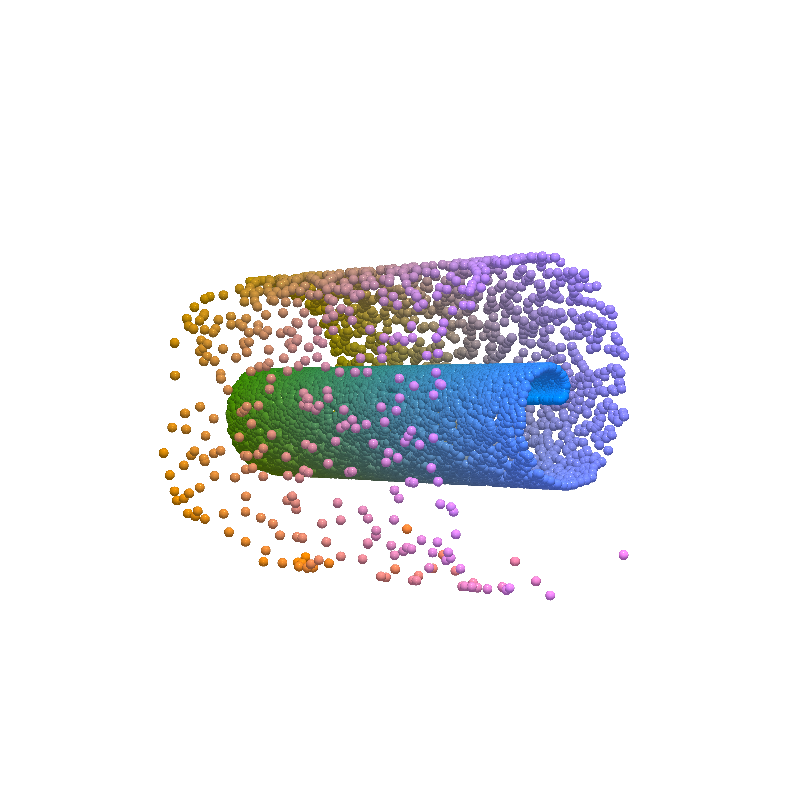

In [13]:
plot_reconstruction(
    sampled_state.numpy(), sampled_index_colors, root=result_save_path
)

## Density Estimation

In [14]:
from pdmtut.vis import plot_density

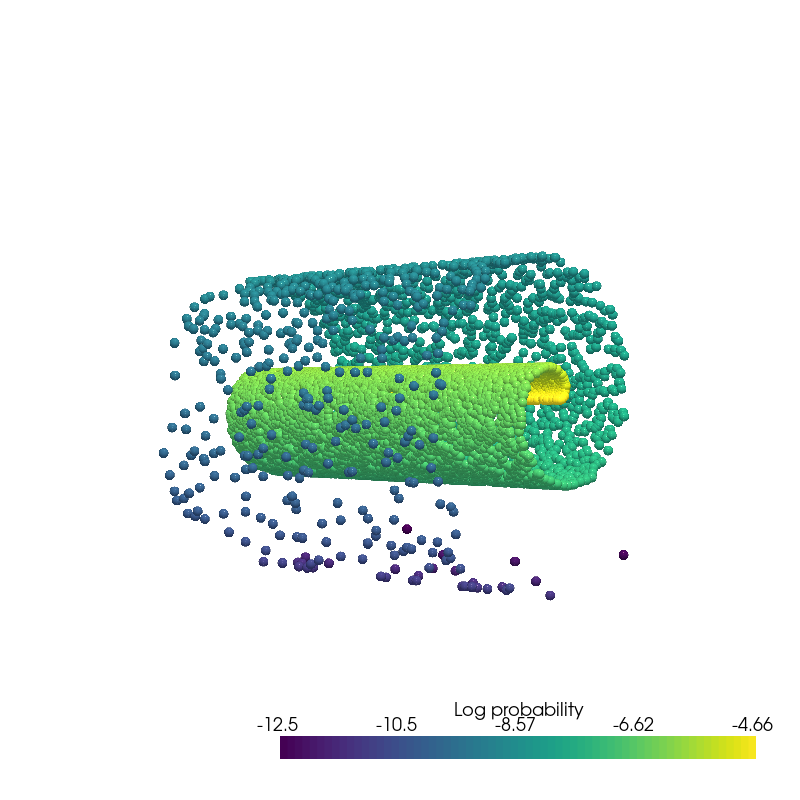

In [15]:
plot_density(sampled_state.numpy(), sampled_log_prob.numpy(), root=result_save_path)

## Interpolation

In [16]:
from pdmtut.vis import plot_interpolation
from scipy.interpolate import interp1d

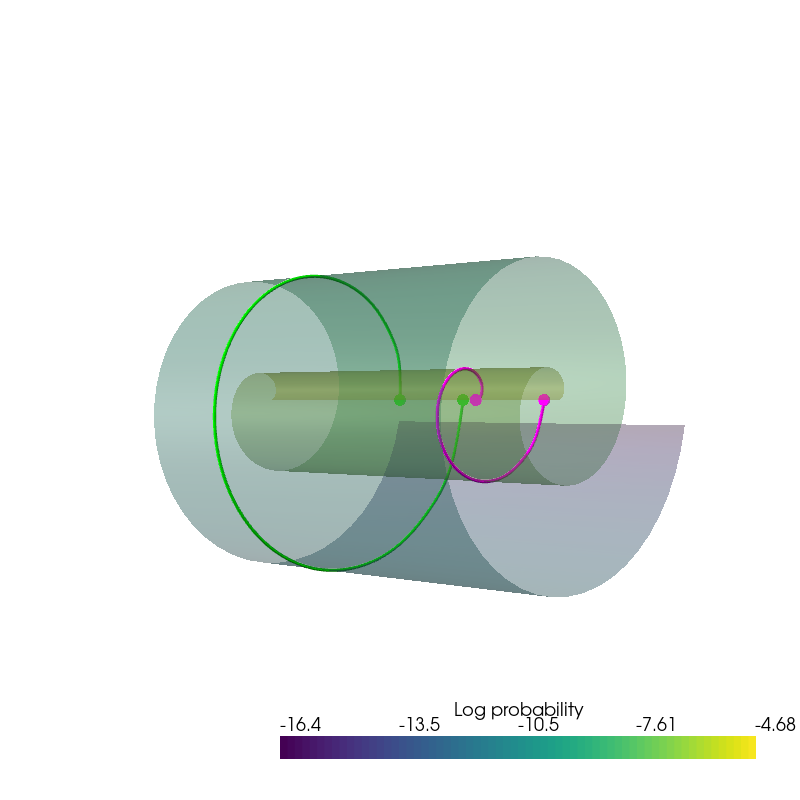

In [17]:
linfit1 = interp1d([1,20], z_extremes[:2].numpy(), axis=0)
linfit2 = interp1d([1,20], z_extremes[2:].numpy(), axis=0)

interpolated_points_1, _, _ = dataset.gen_data_from_initial_tensor(torch.Tensor(linfit1(np.arange(1,21))))
interpolated_points_2, _, _ = dataset.gen_data_from_initial_tensor(torch.Tensor(linfit2(np.arange(1,21))))

plot_interpolation(
    interpolated_points_1.numpy(), interpolated_points_2.numpy(), 
    uniform_state.detach().view(100, 100, 3).permute(2, 0, 1).numpy(), 
    mesh_log_prob=uniform_log_prob, root=result_save_path
)